In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #自定义图表风格

%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei']#指定默认字体
mpl.rcParams['font.family']='Times New Roman'#指定默认字体

In [10]:
data = pd.read_csv("D:/homework/000001.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.0500,99.9800,95.7900,99.9800,126000,4.940000e+05,NaN
1990-12-20,99.9800,104.3000,104.3900,99.9800,104.3900,19700,8.400000e+04,0.044109
1990-12-21,104.3900,109.0700,109.1300,103.7300,109.1300,2800,1.600000e+04,0.045407
1990-12-24,109.1300,113.5700,114.5500,109.1300,114.5500,3200,3.100000e+04,0.049666
1990-12-25,114.5500,120.0900,120.2500,114.5500,120.2500,1500,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-07-25,2901.9518,2891.8918,2897.7674,2872.8497,2886.7416,27463950000,2.730000e+11,-0.005241
2024-07-26,2886.7416,2885.9953,2899.1162,2875.3959,2890.8973,27838753600,2.750000e+11,0.001440
2024-07-29,2890.8973,2889.4726,2898.9512,2878.5825,2891.8453,25689972700,2.600000e+11,0.000328


In [11]:
data_new = data['1995-01-01':'2024-12-31'].copy()
Month_data=data_new.resample('ME')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-03-31,0.008622
2024-04-30,0.020932
2024-05-31,-0.005801


In [12]:
Quarter_data = data_new.resample('QE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Year_data=data_new.resample('YE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Quarter_data
Year_data

,Return
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


# 描述性统计

# 均值mean


In [13]:
np.mean(Month_data['2000':'2024']['Return'])

np.float64(0.005088899963970471)

In [14]:
Month_data['2000':'2024']['Return'].mean().round(4)

np.float64(0.0051)

In [15]:
round(Month_data['2000':'2024']['Return'].mean(),4)

np.float64(0.0051)

In [17]:
print('中国股票市场平均月收益率为：',round(Month_data['2000':'2024']['Return'].mean()*100,4),"%",sep='')

中国股票市场平均月收益率为：0.5089%


In [18]:
Quarter_data=data_new.resample('QE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
print('中国股票市场平均季度收益率为：',round(Quarter_data['2000':'2024']['Return'].mean()*100,4),"%",sep='')

中国股票市场平均季度收益率为：1.735%


In [19]:
sum(Month_data['2000':'2024']['Return'])/len(Month_data['2000':'2024']['Return'])

0.005088899963970471

$$
\bar{R}= \frac{\sum{R}}{N}
$$

In [20]:
Month_data['2000':'2024']['Return'].describe()

count    295.000000
mean       0.005089
std        0.070356
min       -0.246314
25%       -0.038159
50%        0.004454
75%        0.042758
max        0.274464
Name: Return, dtype: float64

均值0.005 标准差0.07

- 第一组-0.24<=R<=-0.037
- 第二组-0.037<=R<=-0.004
- 第三组
- 第四组


# 分位数

In [21]:
from statistics import quantiles
quantiles(Month_data['2000':'2024']['Return'],n=5)

[-0.04846718685276865,
 -0.006189046318517422,
 0.018792518519076394,
 0.0519280802231048]

In [22]:
Month_data[Month_data['Return']>0.052147828136706396]

,Return
Day,
1995-03-31,0.177803
1995-05-31,0.207922
1995-07-31,0.103032
1996-04-30,0.224249
1996-06-30,0.249514
...,...
2020-07-31,0.109004
2022-06-30,0.066592
2022-11-30,0.089115


## 方差/标准差
variance $\sigma^2$
标准差就是$\sigma$

$$
\sigma^2= \frac{\sum{(R- \bar{R}^2)}}{N}
$$

In [23]:
Month_variance=data_new.resample('ME')['Return'].var().to_frame()
Month_variance.rename(columns={'Return':'Variance'},inplace=True)
Month_variance

,Variance
Day,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2024-03-31,0.000042
2024-04-30,0.000080
2024-05-31,0.000048


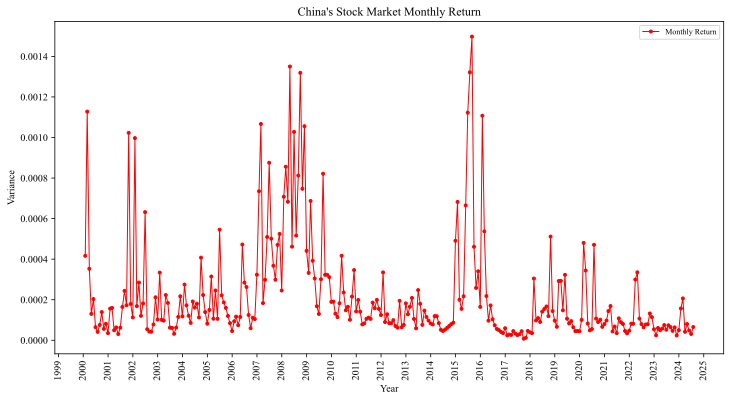

In [24]:
fig, ax=plt.subplots(figsize=(12,6))

ax.plot('Variance',#图片数据
'.-',#图片类型
color='r',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_variance['2000':])#图片数据来源
ax.set_title("China's Stock Market Monthly Return")#图片标题

ax.set_ylabel('Variance')#图片y轴标签
ax.set_xlabel('Year')#图片x轴标签

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转置x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=8)
plt.show();

In [25]:
Month_variance=data_new.resample('ME')['Return'].apply(lambda x: sum(x**2)).to_frame()
Month_variance.rename(columns={'Return':'Variance'},inplace=True)
Month_variance

,Variance
Day,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-03-31,0.000841
2024-04-30,0.001542
2024-05-31,0.000915


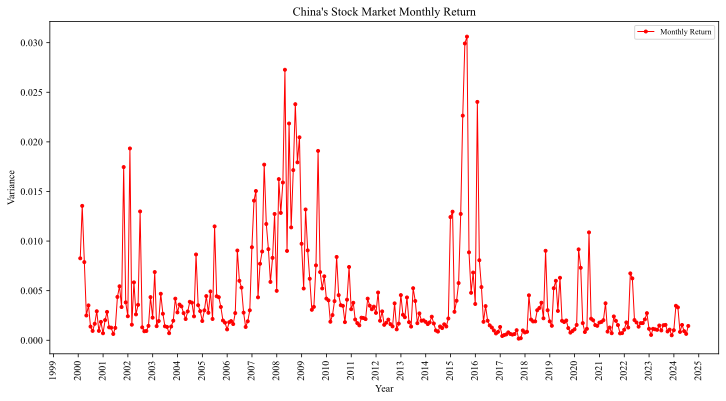

In [26]:
fig, ax=plt.subplots(figsize=(12,6))

ax.plot('Variance',#图片数据
'.-',#图片类型
color='r',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_variance['2000':])#图片数据来源
ax.set_title("China's Stock Market Monthly Return")#图片标题

ax.set_ylabel('Variance')#图片y轴标签
ax.set_xlabel('Year')#图片x轴标签

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转置x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=8)
plt.show();

# 偏度 skewness

$$
S= \frac{1}{N} \sum^{N}_{i} [(\frac{R-\bar{R}}{\sigma})^3]
$$

In [27]:
len(data_new[data_new['Return']>0]) / len(data_new)

0.5226956279587859

In [28]:
len(Month_data[Month_data['Return']>0]) / len(Month_data)

0.5267605633802817

In [29]:
Quarter_data=data_new.resample('QE')['Return'].apply(lambda x: (1+x).prod()-1).to_frame()
len(Quarter_data[Quarter_data['Return']>0]) / len(Quarter_data)

0.5042016806722689

In [30]:
# 日数据偏度
data_new['Return'].skew()

np.float64(0.6895290296509474)